In [1]:
import os
import pickle
import sys

import keras
from keras.applications.resnet50 import ResNet50
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape,GlobalAveragePooling2D
from keras.models import Model, load_model
from keras import backend as K
from keras import losses
from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_train_labelled = pickle.load(open("./"+'BP_61'+"/X_train_labelled.pkl", "rb"))
y_train_labelled = pickle.load(open("./"+'BP_61'+"/y_train_labelled.pkl", "rb"))

X_test_labelled = pickle.load(open("./"+'BP_61'+"/X_test_labelled.pkl", "rb"))
y_test_labelled = pickle.load(open("./"+'BP_61'+"/y_test_labelled.pkl", "rb"))

In [3]:
X_train_labelled=X_train_labelled.astype('float32')
X_test_labelled=X_test_labelled.astype('float32')

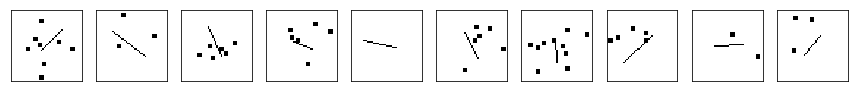

In [4]:
#部分显示图片
n = 10 # how many digits we will display
plt.figure(figsize=(15, 15))
for i in range(n):
    # display original
    #ax = plt.subplot(2, n, i + 1)
    ax=plt.subplot(1, 10, i+1)
    plt.imshow(X_train_labelled[i].reshape(48,48))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [5]:
import cv2
X_train = [cv2.cvtColor(cv2.resize(i, (48, 48)), cv2.COLOR_GRAY2RGB) for i in X_train_labelled]
X_test=[cv2.cvtColor(cv2.resize(i, (48,48)), cv2.COLOR_GRAY2RGB)
           for i in X_test_labelled]

In [6]:
X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32')
X_test = np.concatenate([arr[np.newaxis] for arr in X_test]).astype('float32')

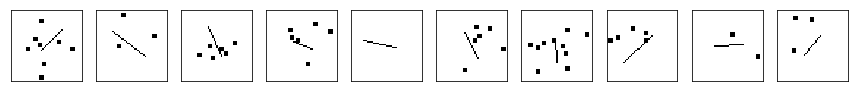

In [7]:
#部分显示图片
n = 10 # how many digits we will display
plt.figure(figsize=(15, 15))
for i in range(n):
    # display original
    #ax = plt.subplot(2, n, i + 1)
    ax=plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

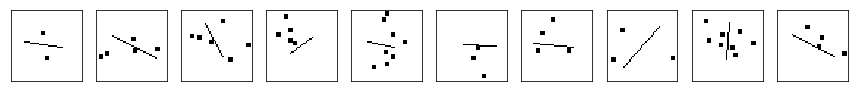

In [8]:
#部分显示图片
n = 10 # how many digits we will display
plt.figure(figsize=(15, 15))
for i in range(n):
    # display original
    #ax = plt.subplot(2, n, i + 1)
    ax=plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_labelled)
y_test = to_categorical(y_test_labelled)

In [ ]:
resnet50_model = ResNet50(weights = 'imagenet', include_top = False)
x = resnet50_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation = 'softmax')(x)
model = Model(input = resnet50_model.input, output = predictions)

In [ ]:
model.summary( )

In [ ]:
# freeze all layers of the pre-trained model
for layer in resnet50_model.layers:
    layer.trainable = False

In [ ]:
model.summary()

In [ ]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
# fit the model, log the results and the training time
transfer_learning_history = model.fit(
    X_train[0:12],y_train[0:12],
    epochs =3,
    batch_size=12)